In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
df = pd.read_csv('/content/drive/MyDrive/422 project/cardio_train.csv', sep = ";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df.shape

(70000, 13)

In [16]:
# data = pd.DataFrame(df).to_numpy()
# seaborn.heatmap(data)

In [17]:
df['age'] = df["age"]//365
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [18]:
df.isnull().values.any()

False

In [19]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

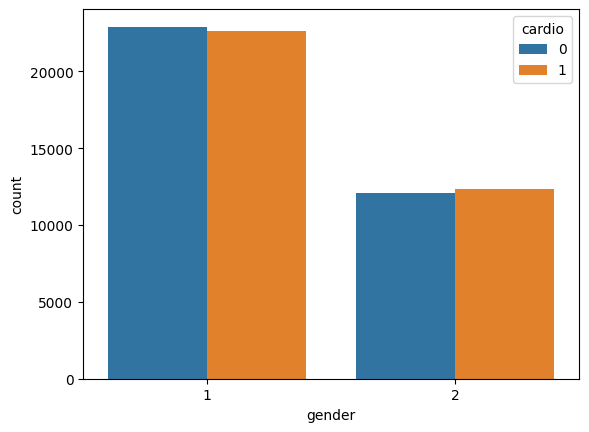

In [20]:
# here 1 is Male and 2 is Female
seaborn.countplot(x = 'gender', hue = 'cardio', data= df)

<Axes: xlabel='age', ylabel='count'>

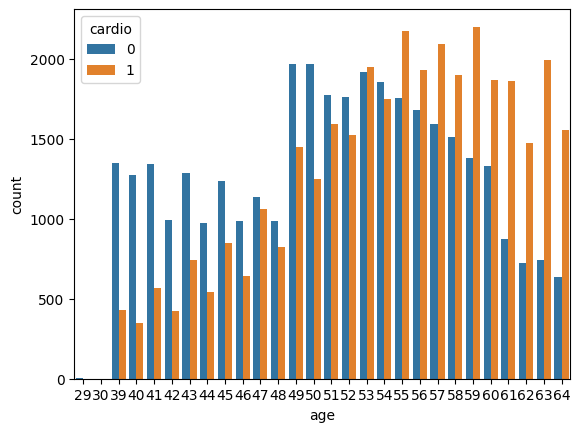

In [21]:
seaborn.countplot(x = 'age', hue = 'cardio', data= df)

In [22]:
# so lets just plot cardio for every column

In [23]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [25]:
# hm = seaborn.heatmap(data = df, annot = True)
# plt.show()

<Axes: >

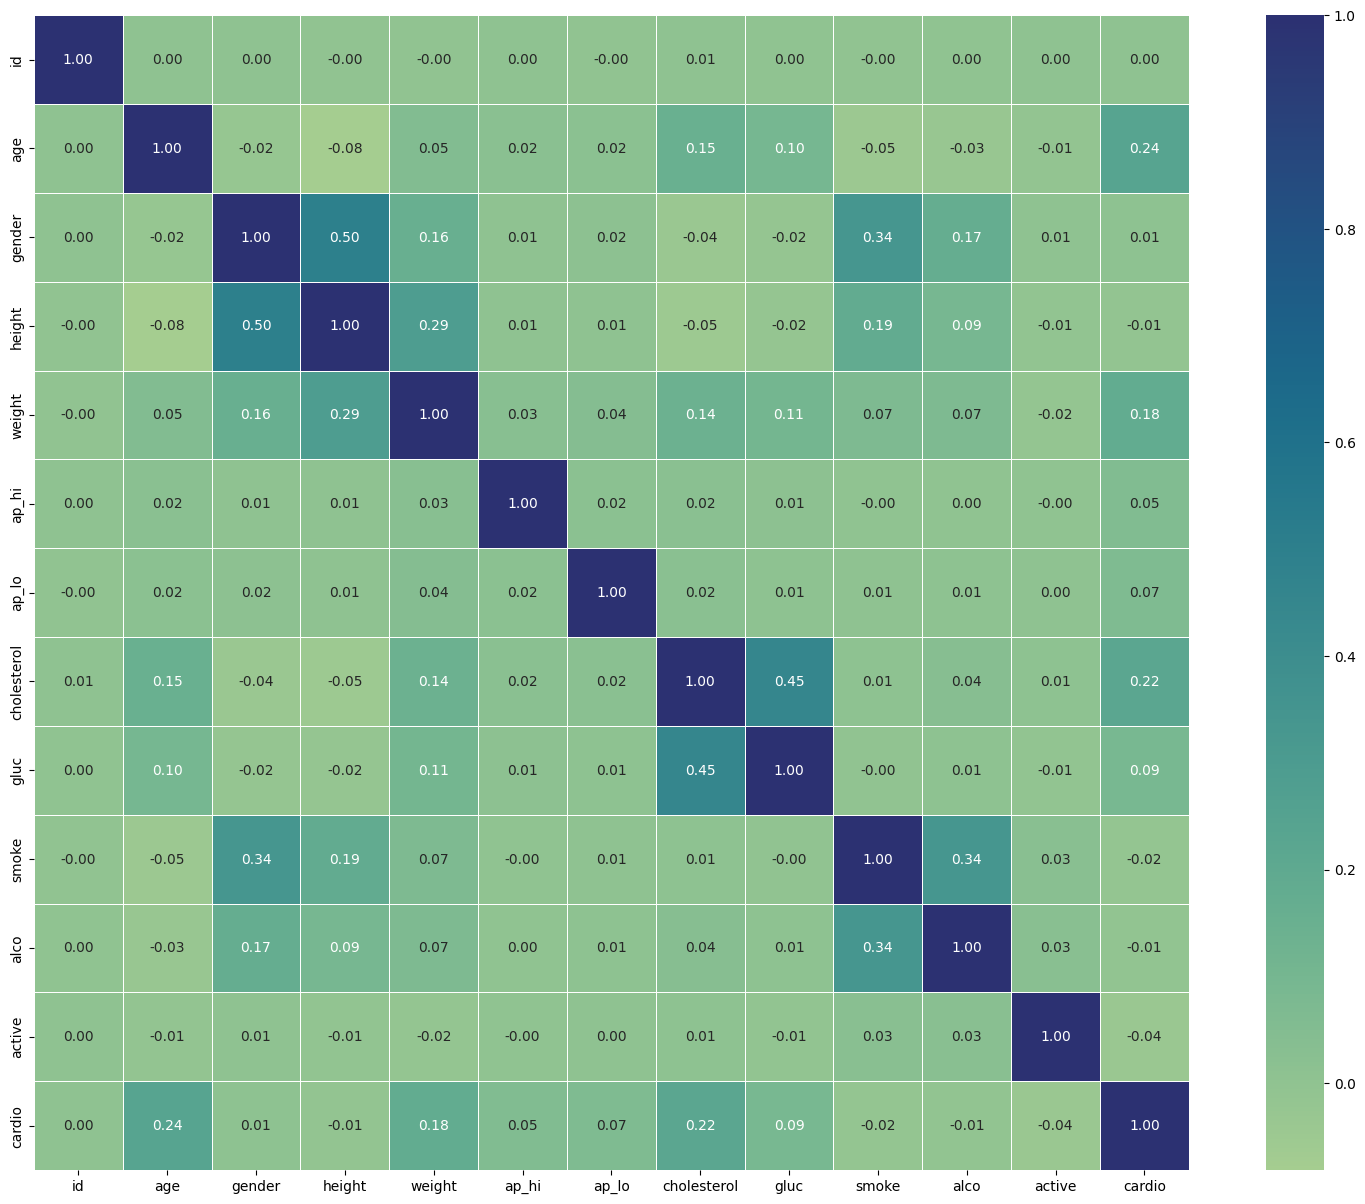

In [26]:
plt.figure(figsize=(20,15))
seaborn.heatmap(df.corr(),annot=True, fmt=".2f",linewidth=.5, cmap="crest", square = True)

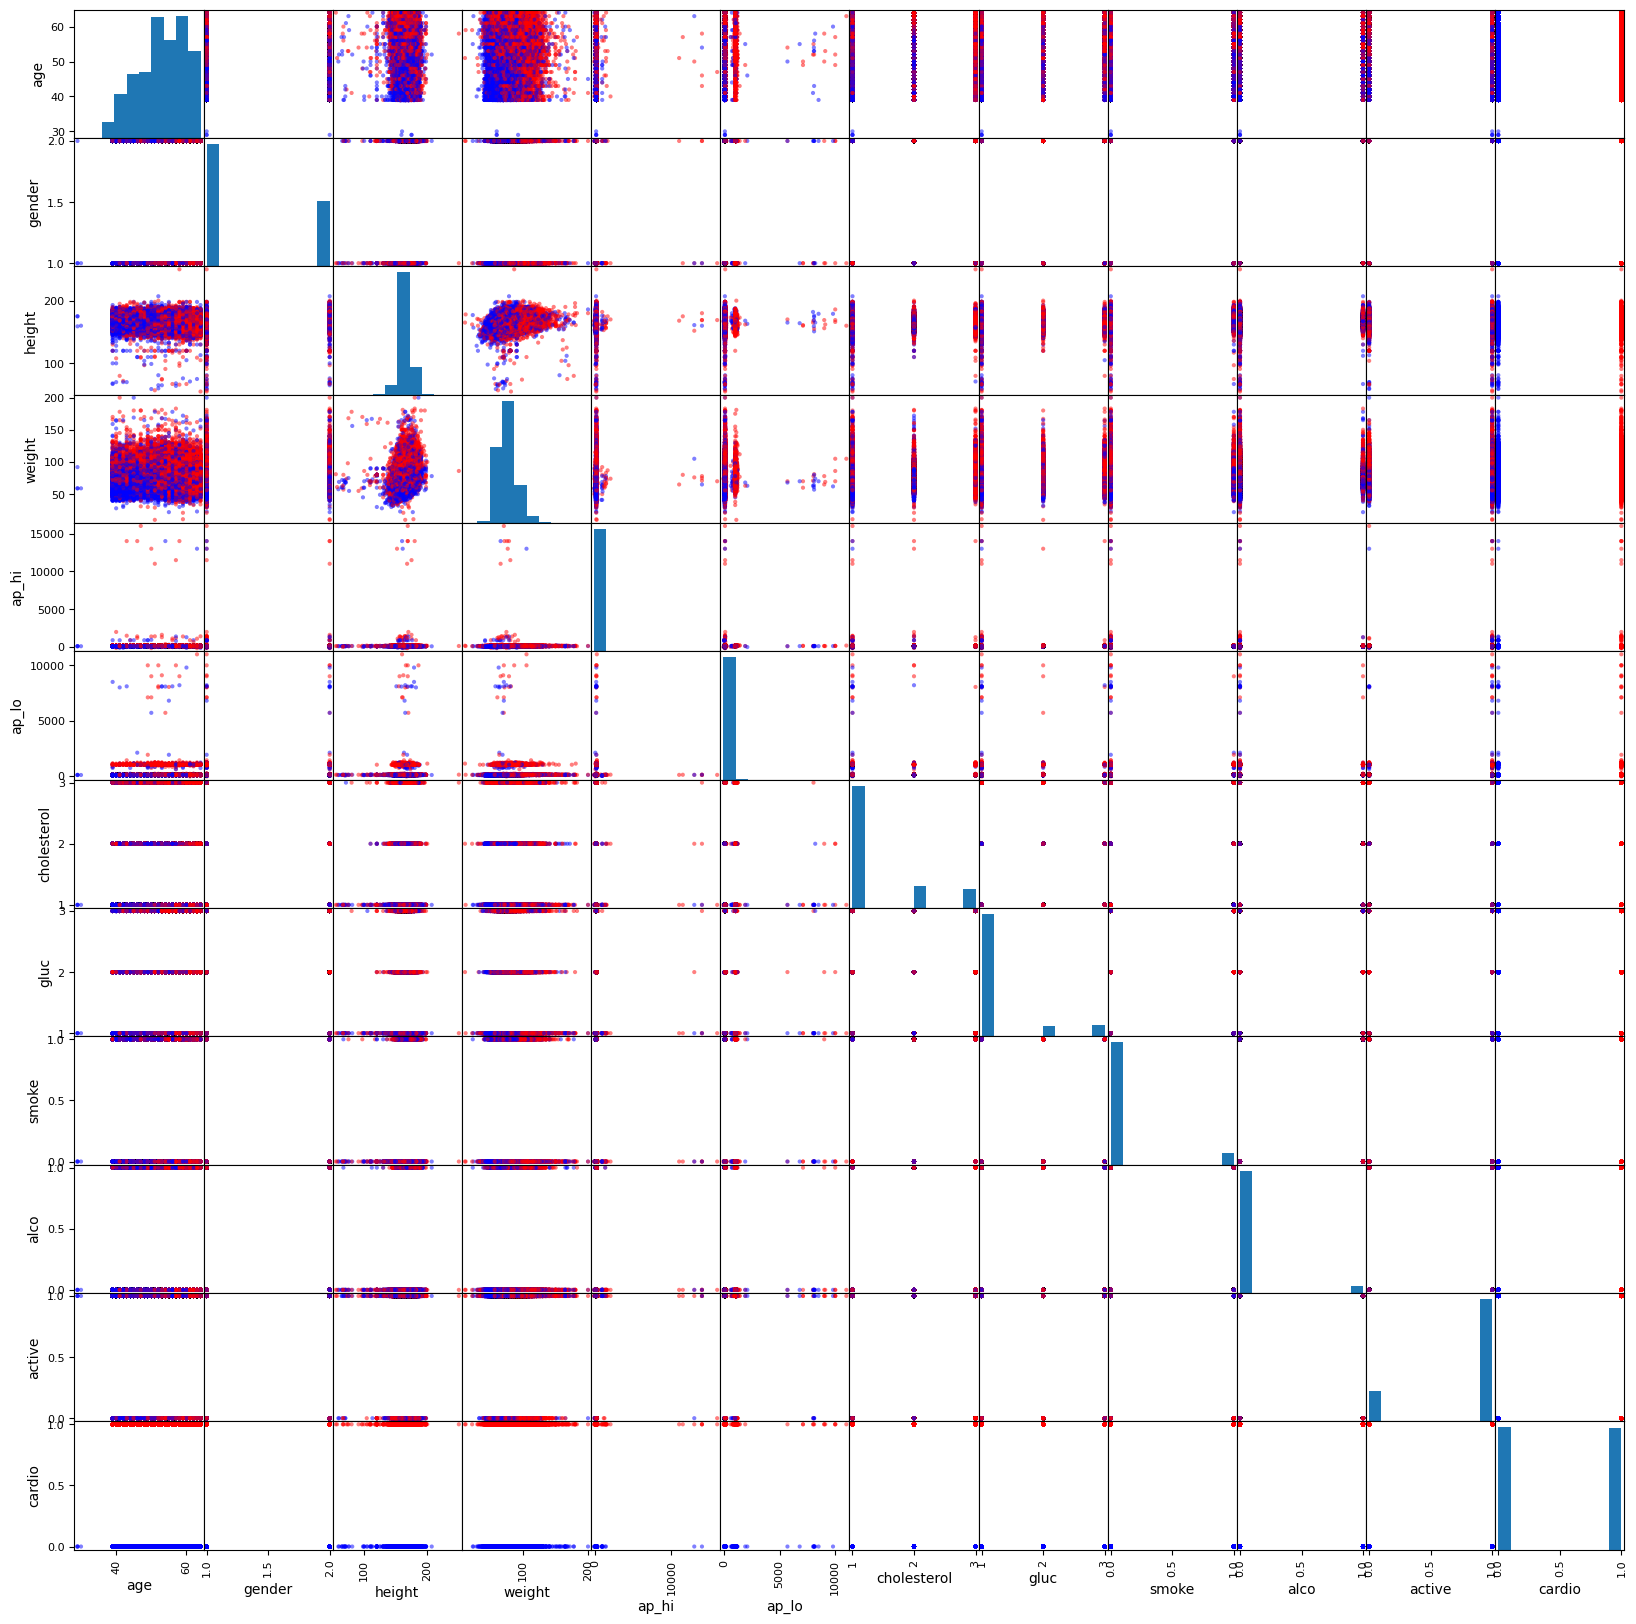

In [27]:
from pandas.plotting import scatter_matrix
colors = df["cardio"].map({0: 'blue', 1: 'red'})
scatter_matrix(df[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']], c = colors,figsize=(20, 20))
plt.show()

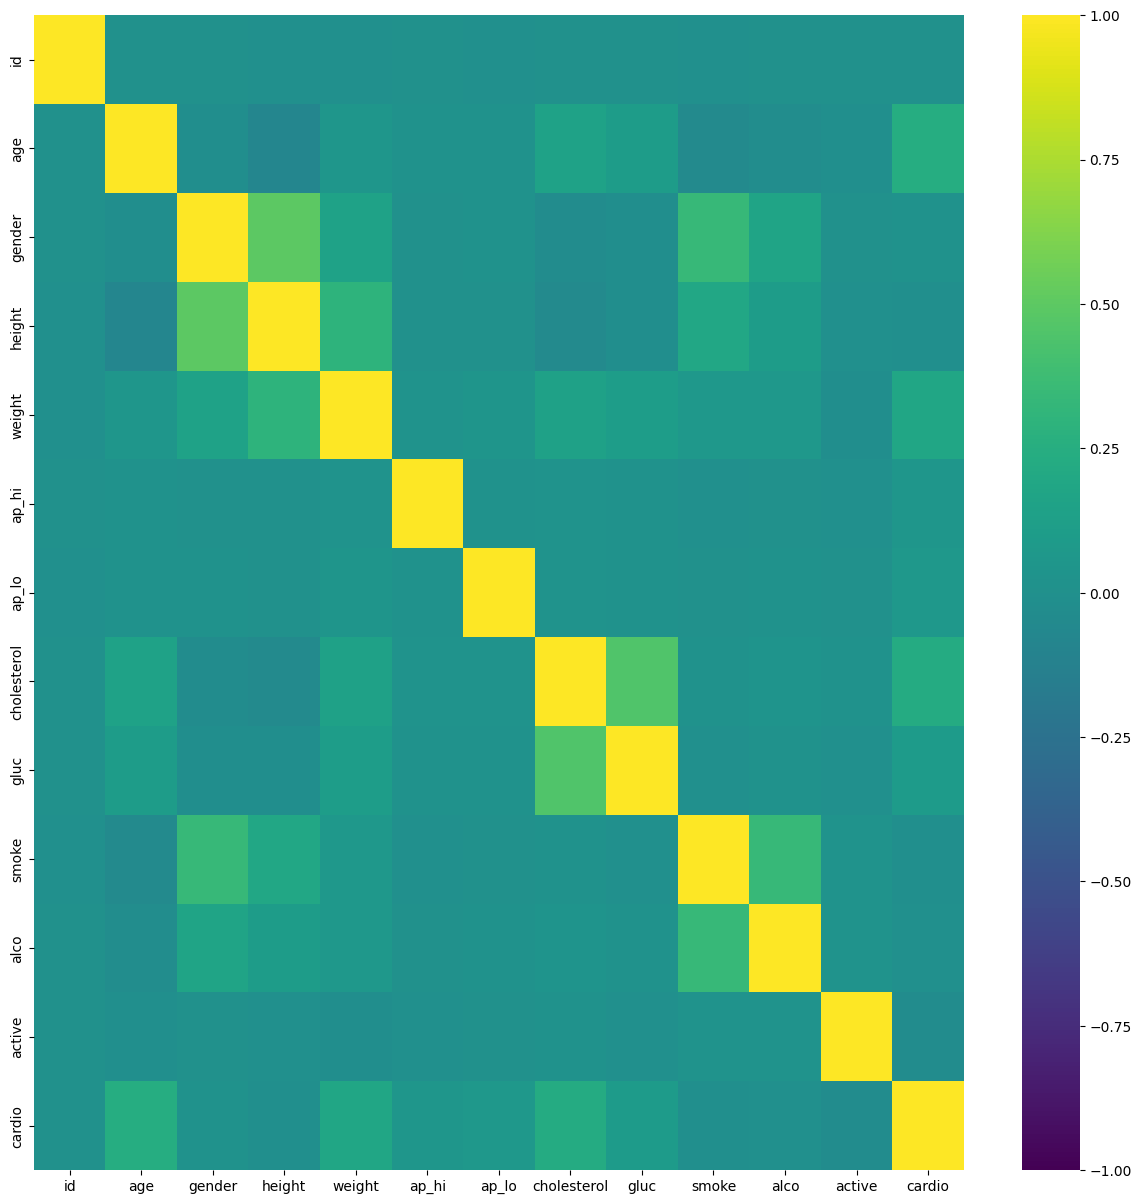

In [28]:
plt.figure(figsize=(15, 15))

# Create the heatmap with modified parameters
seaborn.heatmap(df.corr(method='pearson'),
            fmt='.1g',
            vmin=-1, vmax=1,
            center=0,
            cmap='viridis',
            linewidths=0,
            linecolor='black')

plt.show()

In [29]:
cleaned_data = df.drop(["id"], axis = 1)

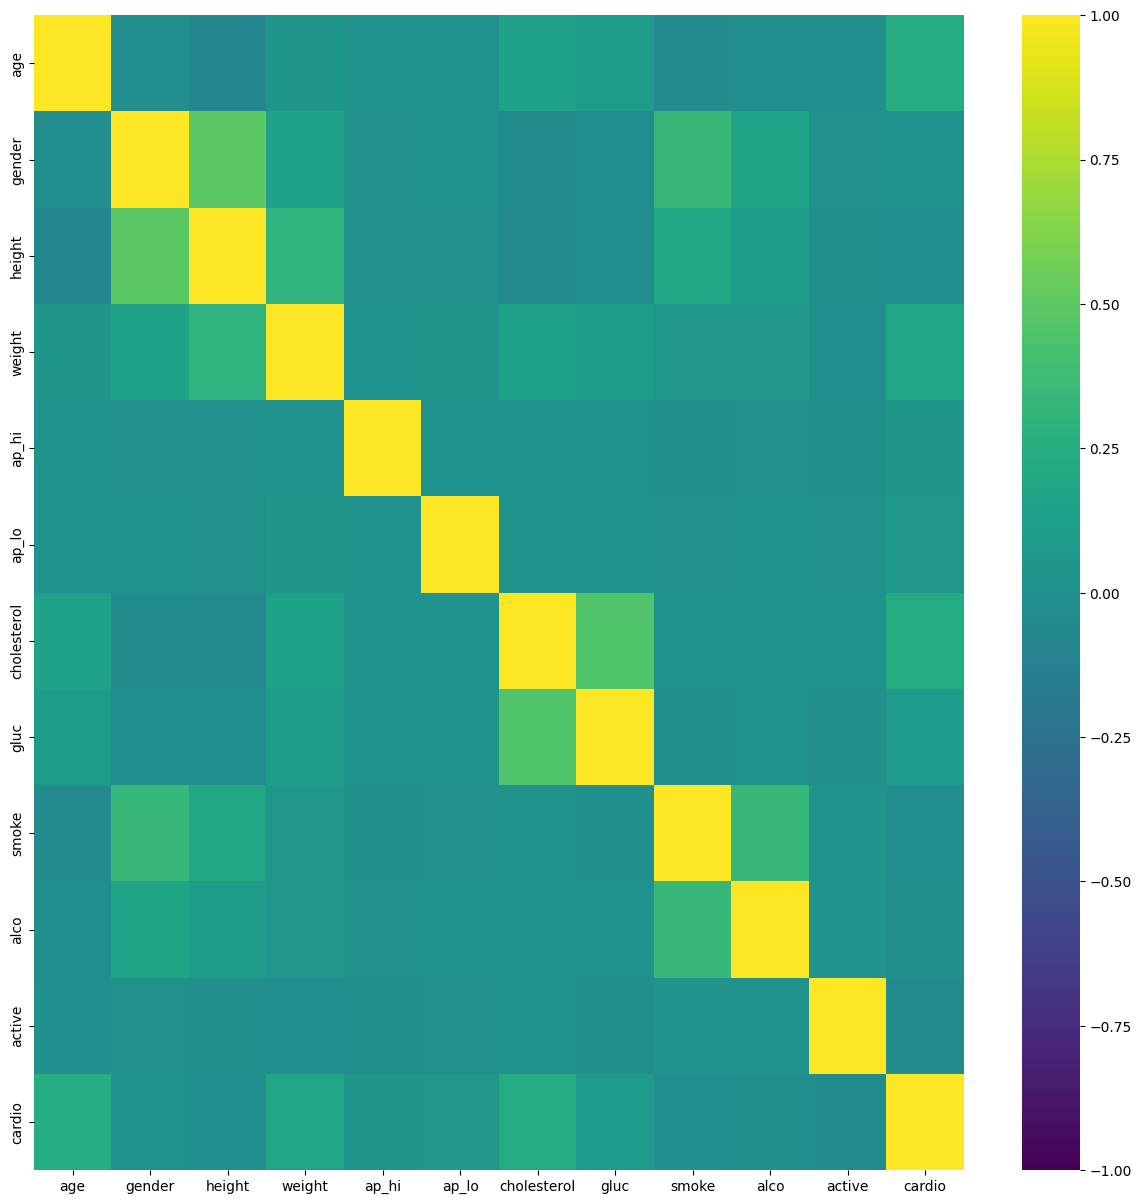

In [30]:
plt.figure(figsize=(15, 15))

# Create the heatmap with modified parameters
seaborn.heatmap(cleaned_data.corr(method='pearson'),
            fmt='.1g',
            vmin=-1, vmax=1,
            center=0,
            cmap='viridis',
            linewidths=0,
            linecolor='black')

plt.show()

['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


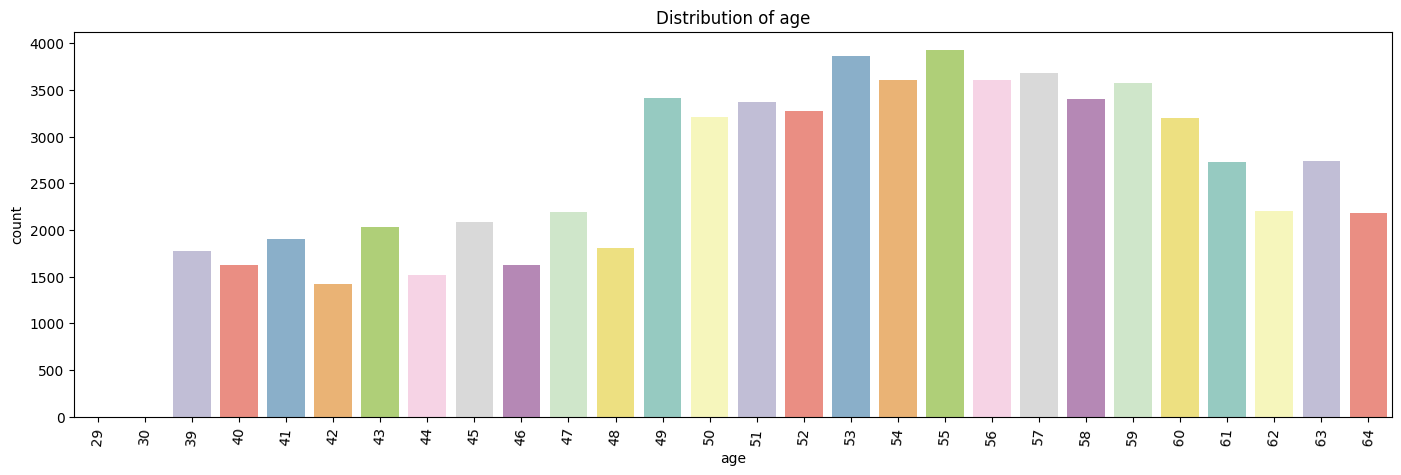

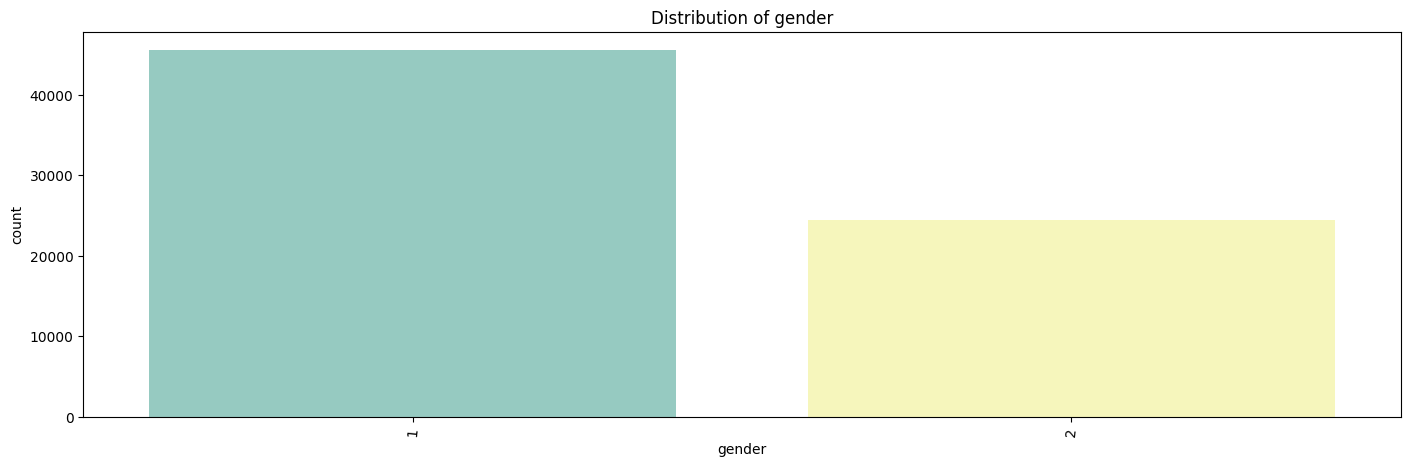

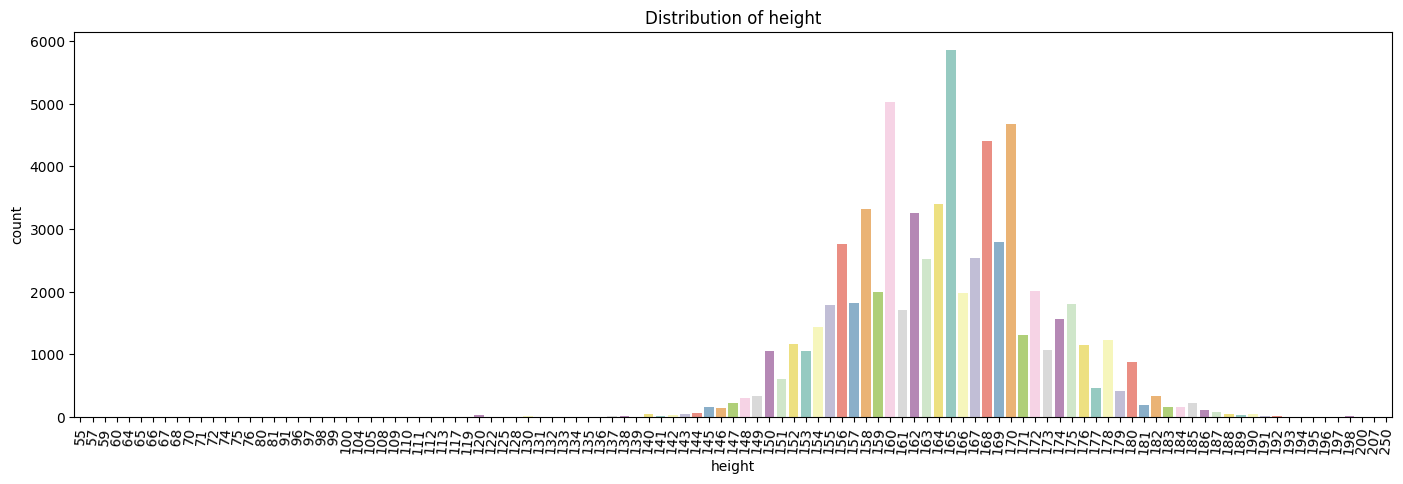

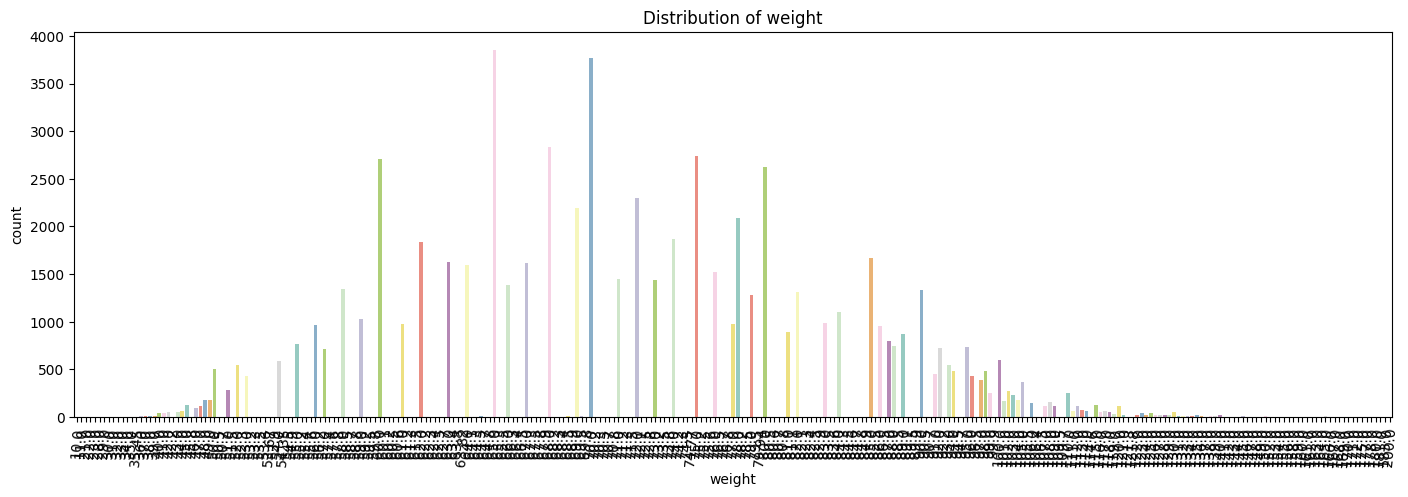

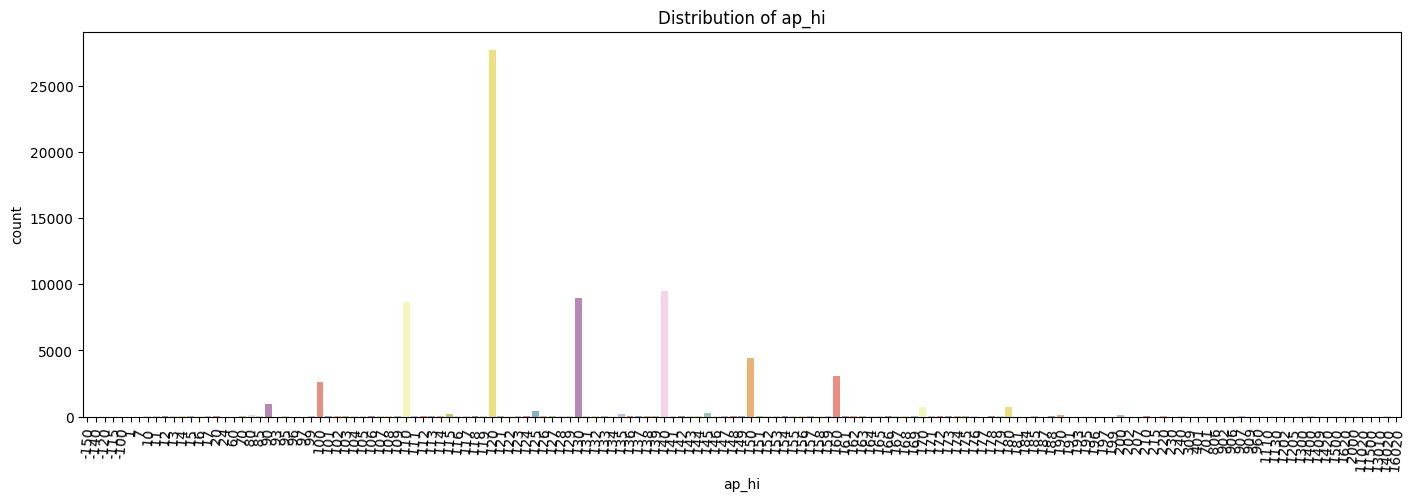

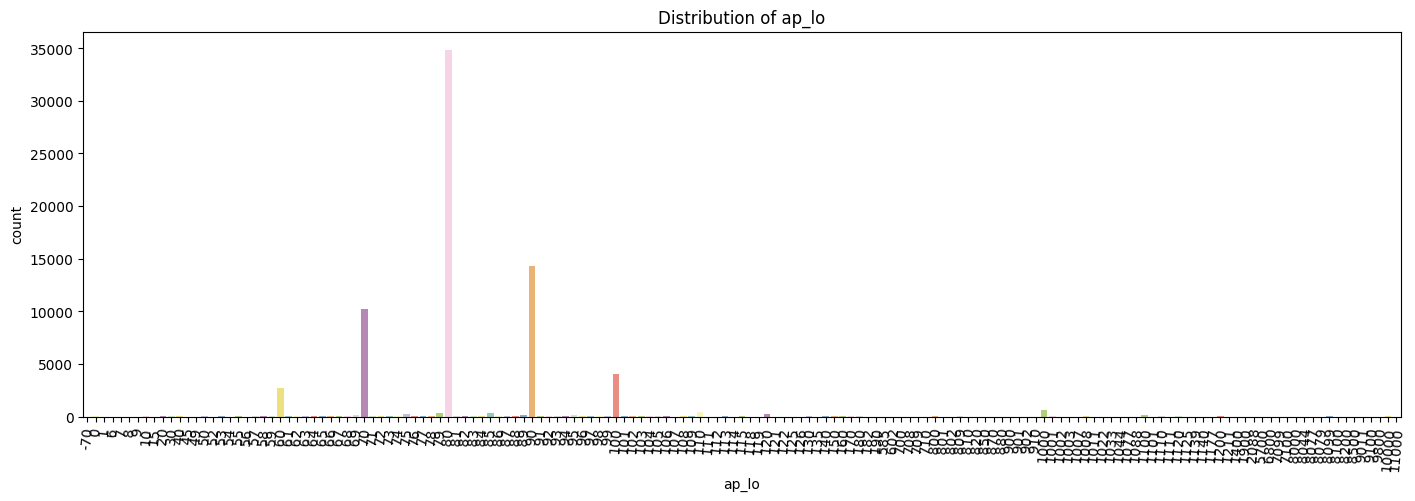

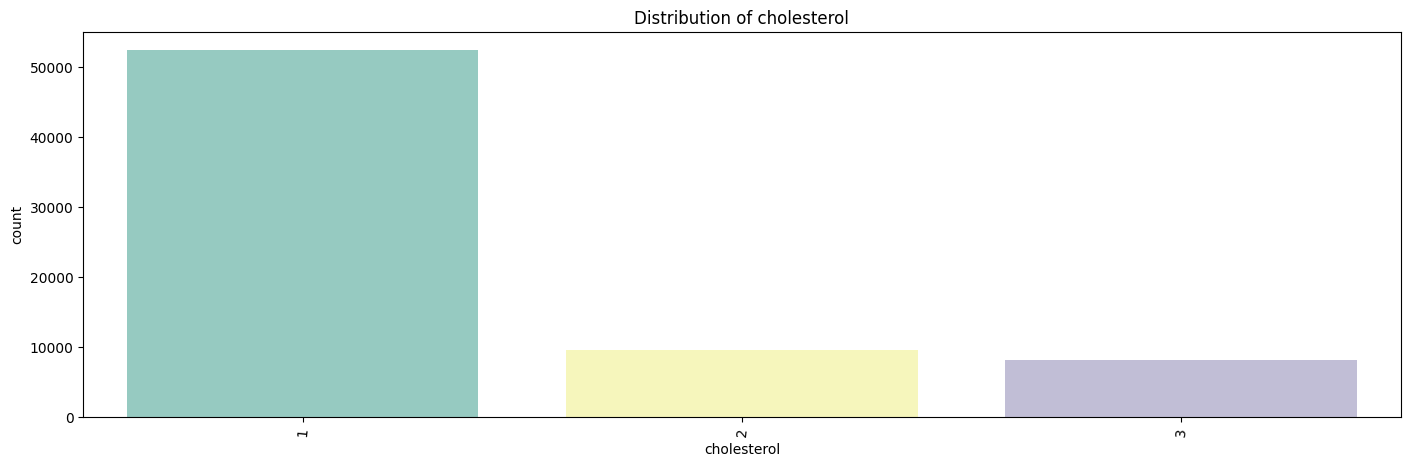

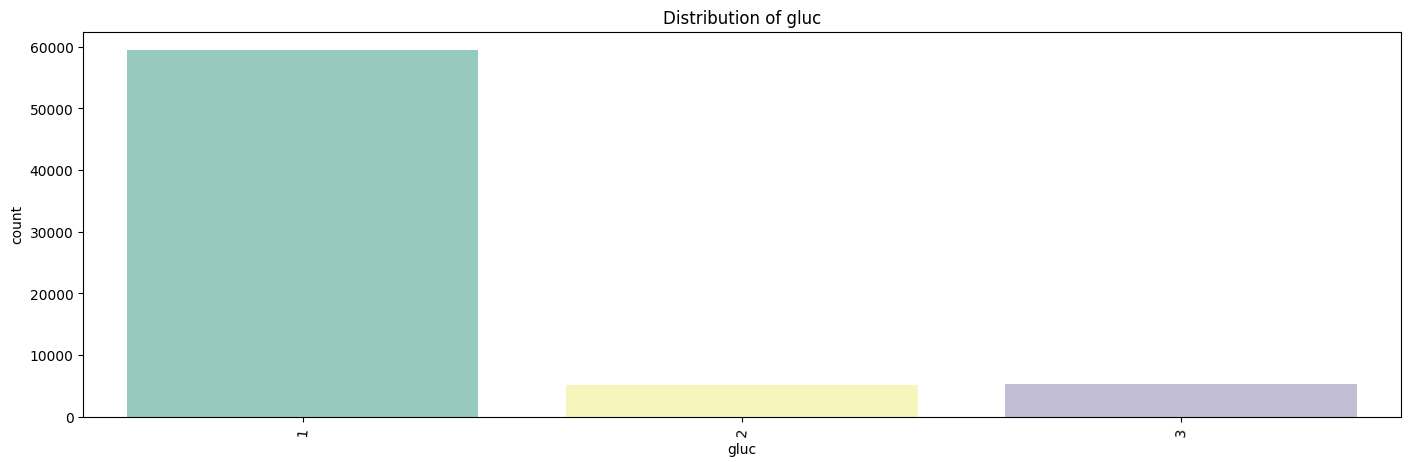

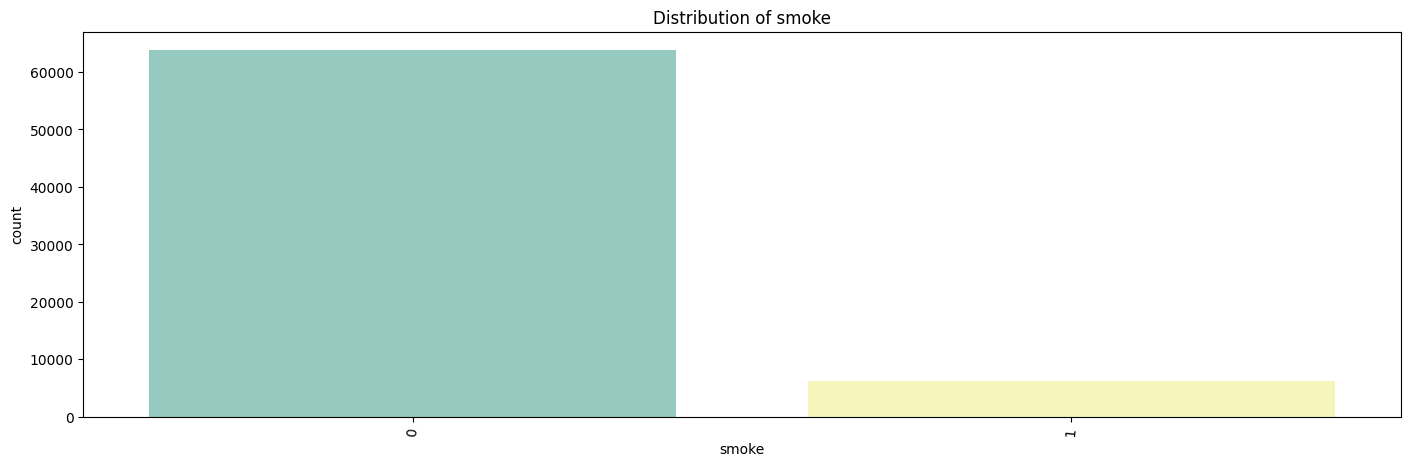

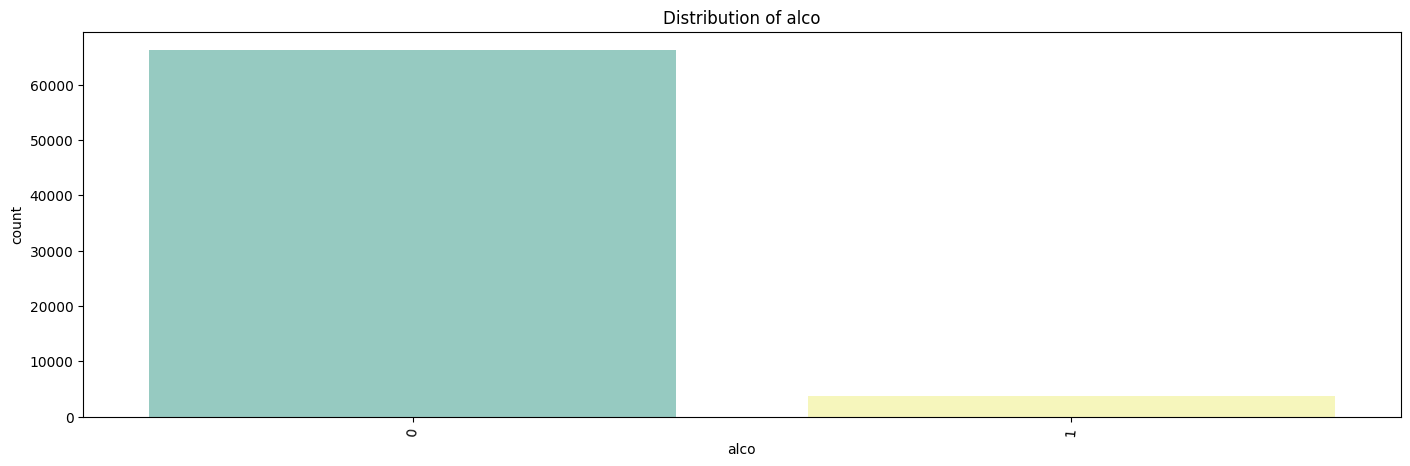

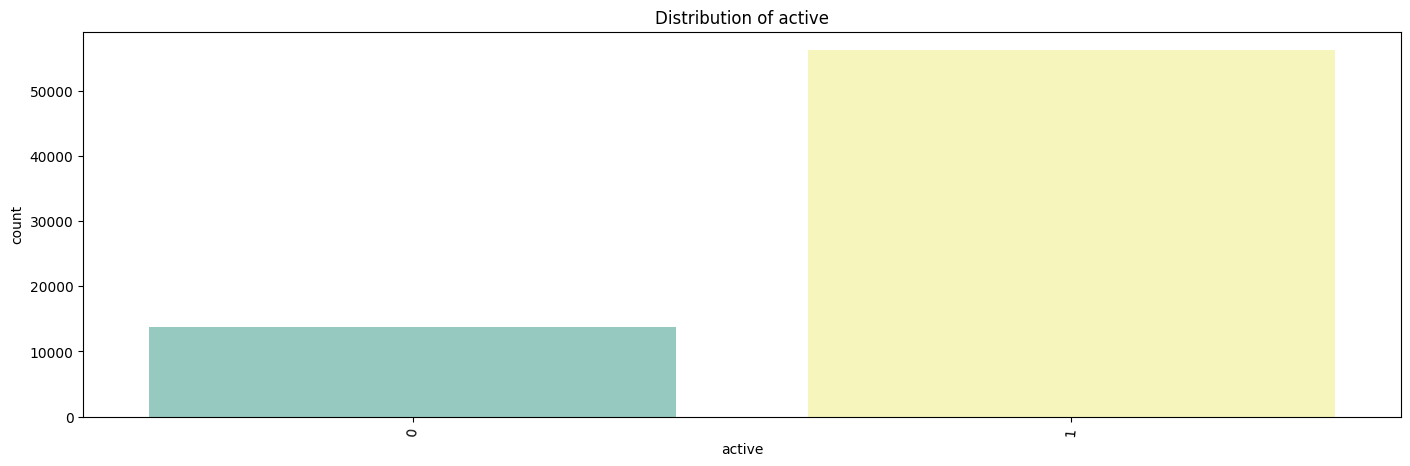

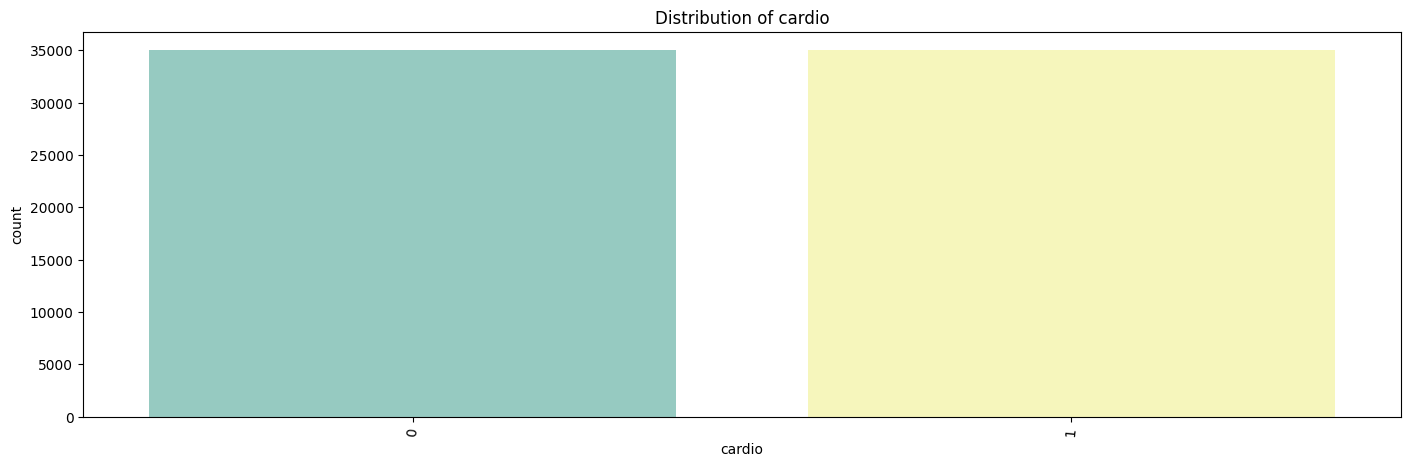

In [31]:
column_names = df.columns.tolist()
categorical_cols = column_names[1:]
print(categorical_cols)
for feature in categorical_cols:
    plt.figure(figsize=(17, 5))
    seaborn.countplot(data=df, x=feature, palette='Set3')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=85)
    plt.show()

In [32]:
x = cleaned_data.iloc[:,:-1]
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [33]:
y = cleaned_data.iloc[:,-1]
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,stratify=y, random_state = 2)
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
5398,44,2,167,69.0,120,80,1,1,0,0,0
51703,40,2,172,79.0,120,80,2,1,1,0,1
18837,59,2,168,67.0,140,80,1,1,0,1,1
4785,57,1,151,45.0,140,90,3,1,0,0,1
15035,59,2,163,63.0,120,80,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18779,56,1,163,69.0,130,90,1,1,0,0,0
42256,45,1,169,65.0,120,80,1,1,0,0,1
10544,59,1,160,61.0,130,90,2,1,0,0,1
48177,39,1,160,53.0,126,82,1,1,0,0,0


In [35]:
ytrain


5398     0
51703    0
18837    1
4785     1
15035    0
        ..
18779    0
42256    0
10544    0
48177    0
57470    0
Name: cardio, Length: 49000, dtype: int64

In [36]:
xtest

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
39918,53,1,170,56.0,120,80,1,1,0,0,1
50973,49,1,159,52.0,110,70,1,1,0,0,1
25412,53,2,181,85.0,140,70,1,1,0,0,0
39982,50,2,177,70.0,150,90,1,1,0,0,1
42817,40,1,160,60.0,120,60,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
52473,63,1,156,81.0,140,100,1,3,0,0,1
52666,51,1,163,80.0,140,90,1,1,0,0,1
22027,49,1,155,64.0,120,80,1,1,0,0,1
16718,50,1,156,53.0,120,80,1,1,0,0,1


In [37]:
ytest

39918    0
50973    0
25412    1
39982    1
42817    0
        ..
52473    1
52666    1
22027    0
16718    0
60599    0
Name: cardio, Length: 21000, dtype: int64

In [38]:
Log = LogisticRegression(max_iter=500000)

In [39]:
Log.fit(xtrain,ytrain)

LogisticRegression(max_iter=500000)

In [40]:
X_train_prediction = Log.predict(xtrain)
training_data_accuracy = accuracy_score(X_train_prediction, ytrain)

In [41]:
print(training_data_accuracy)

0.7209387755102041


In [42]:
X_test_prediction = Log.predict(xtest)
test_data_accuracy = accuracy_score(X_test_prediction, ytest)

In [43]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7186666666666667
